In [1]:
# uncomment this line if you want to use interactive plot (only works in Jupyter but not in VScode)
# %matplotlib ipympl

import time
from pathlib import Path
from operator import itemgetter

import scanpy as sc
import numpy as np
from scipy.sparse import csr_matrix
import pandas as pd
from joblib import Parallel, delayed


import scSLAT
from scSLAT.model import run_SLAT_multi
from scSLAT.viz import build_3D
import scanpy as sc
import numpy as np
import pandas as pd

import scSLAT
from scSLAT.model import Cal_Spatial_Net, load_anndatas, run_SLAT_mlp2, spatial_match
from scSLAT.viz import match_3D_multi, hist, Sankey
from scSLAT.metrics import region_statistics

In [2]:
import scanpy as sc
import os
file_path_1 = os.path.join('D:/ppppaper/data/DLPFC/DLPFC/','151507')
adata_1 = sc.read_visium(path=file_path_1, count_file='filtered_feature_bc_matrix.h5', load_images=True)
adata_1.var_names_make_unique(join="++")
# output_file_path_1 = r"D:\ppppaper\data\DLPFC\DLPFC\151507\filtered_feature_bc_matrix.h5ad"
# adata_1.write(output_file_path_1)
# adata_1

Ann_df_1 = pd.read_csv(os.path.join(file_path_1 , '151507_annotation.txt'),sep ='\t', header=0 , index_col=0)
Ann_df_1.loc[Ann_df_1['Layer'].isna(),'Layer'] = "unknown"
adata_1.obs['annotation'] = Ann_df_1.loc[adata_1.obs_names, 'Layer'].astype('category')

d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
file_path_2 = os.path.join('D:/ppppaper/data/DLPFC/DLPFC/','151669')
adata_2 = sc.read_visium(path=file_path_2, count_file='filtered_feature_bc_matrix.h5', load_images=True)
adata_2.var_names_make_unique(join="++")
# output_file_path_2 = r"D:\ppppaper\data\DLPFC\DLPFC\151669\filtered_feature_bc_matrix.h5ad"
# adata_2.write(output_file_path_2)
# adata_2

Ann_df_2 = pd.read_csv(os.path.join(file_path_2 , '151669_annotation.txt'),sep ='\t', header=0 , index_col=0)
Ann_df_2.loc[Ann_df_2['Layer'].isna(),'Layer'] = "unknown"
adata_2.obs['annotation'] = Ann_df_2.loc[adata_2.obs_names, 'Layer'].astype('category')

d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
file_path_3 = os.path.join('D:/ppppaper/data/DLPFC/DLPFC/','151673')
adata_3 = sc.read_visium(path=file_path_3, count_file='filtered_feature_bc_matrix.h5', load_images=True)
adata_3.var_names_make_unique(join="++")
# output_file_path_3 = r"D:\ppppaper\data\DLPFC\DLPFC\151673\filtered_feature_bc_matrix.h5ad"
# adata_3.write(output_file_path_3)
# adata_3

#read annotation
Ann_df_3 = pd.read_csv(os.path.join(file_path_3 , '151673_annotation.txt'),sep ='\t', header=0 , index_col=0)
Ann_df_3.loc[Ann_df_3['Layer'].isna(),'Layer'] = "unknown"
adata_3.obs['annotation'] = Ann_df_3.loc[adata_3.obs_names, 'Layer'].astype('category')
#adata_3.obs['batch_name_idx']=idx

d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


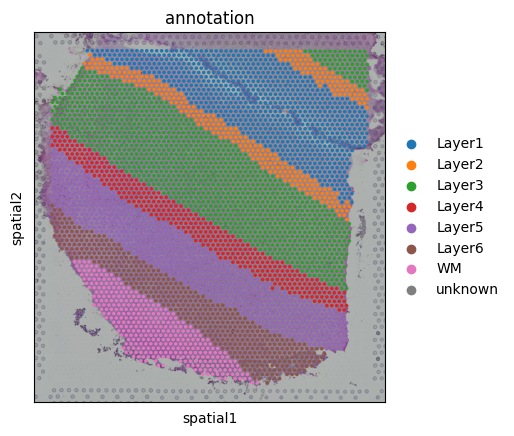

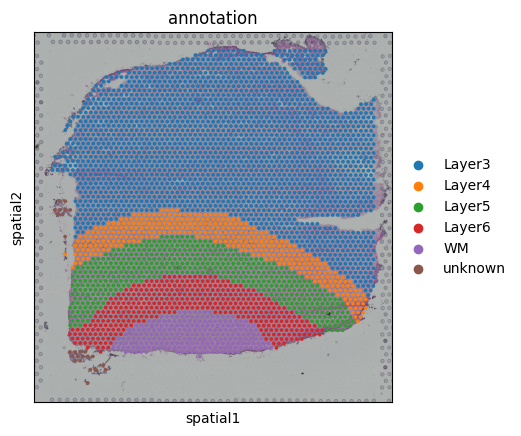

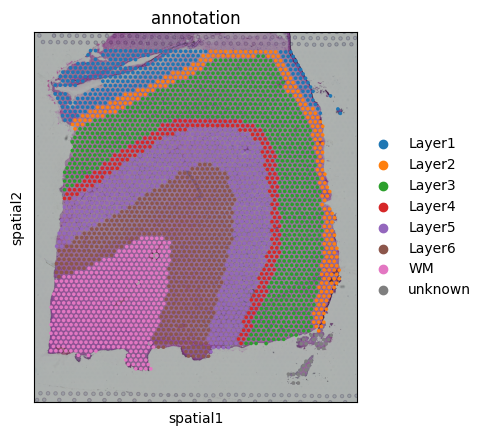

In [5]:
sc.pl.spatial(adata_1, spot_size=100, color='annotation')
sc.pl.spatial(adata_2, spot_size=100, color='annotation')
sc.pl.spatial(adata_3, spot_size=100, color='annotation')

In [6]:
adata_1.obsm['spatial']

array([[3276, 2514],
       [9178, 8520],
       [5133, 2878],
       ...,
       [4218, 9703],
       [4017, 7906],
       [5683, 3359]], dtype=int64)

In [7]:
import torch


x1_coords=adata_1.obsm['spatial'][:,0]
y1_coords=adata_1.obsm['spatial'][:,1]
x2_coords=adata_3.obsm['spatial'][:,0]
y2_coords=adata_3.obsm['spatial'][:,1]
locations_1 = np.array([x1_coords, y1_coords])
locations_2 = np.array([x2_coords, y2_coords])

locations_1_tensor = torch.tensor(locations_1)
locations_2_tensor = torch.tensor(locations_2)
locations_1_tensor = locations_1_tensor.transpose(0, 1)
locations_1_tensor = locations_1_tensor.to(dtype=torch.float32)
locations_2_tensor = locations_2_tensor.transpose(0, 1)
locations_2_tensor = locations_2_tensor.to(dtype=torch.float32)
location = [locations_1_tensor, locations_2_tensor]

location

[tensor([[3276., 2514.],
         [9178., 8520.],
         [5133., 2878.],
         ...,
         [4218., 9703.],
         [4017., 7906.],
         [5683., 3359.]]),
 tensor([[ 9791.,  8468.],
         [ 5769.,  2807.],
         [ 4068.,  9505.],
         ...,
         [ 4631.,  7831.],
         [ 5571., 11193.],
         [ 6317.,  3291.]])]

In [8]:
Cal_Spatial_Net(adata_1, k_cutoff=10, model='KNN')
Cal_Spatial_Net(adata_2, k_cutoff=10, model='KNN')
Cal_Spatial_Net(adata_3, k_cutoff=10, model='KNN')

Calculating spatial neighbor graph ...
The graph contains 44560 edges, 4226 cells.
10.544249881684808 neighbors per cell on average.
Calculating spatial neighbor graph ...
The graph contains 38427 edges, 3661 cells.
10.496312482928161 neighbors per cell on average.
Calculating spatial neighbor graph ...
The graph contains 37811 edges, 3639 cells.
10.390491893377302 neighbors per cell on average.


In [9]:
edges, features = load_anndatas([adata_1, adata_3], feature='DPCA')

Use DPCA feature to format graph


d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [10]:
def theta_from_spatial_graph(locations: np.ndarray, spatial_graph: csr_matrix):
    """
    获取空间图和坐标的方位角
    假设第1维是x, 第2维是y, 第3维是z...

    返回具有theta（方位角）作为.data的CSR矩阵
    """
    theta_data = np.zeros_like(spatial_graph.data, dtype=np.float32)

    for n in range(spatial_graph.indptr.shape[0] - 1):
        ptr_start, ptr_end = spatial_graph.indptr[n], spatial_graph.indptr[n + 1]
        nbr_indices = spatial_graph.indices[ptr_start:ptr_end]

        self_coord = locations[n, :]
        nbr_coord = locations[nbr_indices, :]
        relative_coord = nbr_coord - self_coord

        theta_data[ptr_start:ptr_end] = np.arctan2(relative_coord[:, 1], relative_coord[:, 0])

    theta_graph = spatial_graph.copy()
    theta_graph.data = theta_data

    return theta_graph


In [11]:
from scipy.sparse import csr_matrix


# 确保 tensor 在 CPU 上
coor_arr = location[0].cpu()

# 将 tensor 转换为 numpy 数组
coor_arr = coor_arr.numpy()
print(coor_arr)
edge_index =edges[0]
#print(edge_index)
edge_index_arr = edge_index.cpu().numpy()
start_points = edge_index_arr[0]
end_points = edge_index_arr[1]
#print(start_points)
# 构建 CSR 矩阵
num_nodes = np.max(edge_index_arr) + 1  
data = np.ones(len(start_points))
spatial_graph = csr_matrix((data, (start_points, end_points)), shape=(num_nodes, num_nodes))


distances = np.linalg.norm(coor_arr[start_points] - coor_arr[end_points], axis=1)
spatial_graph = csr_matrix((distances, (start_points, end_points)), shape=(num_nodes, num_nodes))
print(distances)
#print(spatial_graph.data)

# 构建角度矩阵
theta_graph = theta_from_spatial_graph(coor_arr, spatial_graph)
# print(theta_graph)
# print(spatial_graph)

graph_out = spatial_graph.copy()
indptr, data = graph_out.indptr, graph_out.data

for n in range(len(indptr) - 1):

        start_ptr, end_ptr = indptr[n], indptr[n + 1]
        if end_ptr >= start_ptr:
            # row entries correspond to a cell's neighbours
            nbrs = data[start_ptr:end_ptr]
            median_r = np.median(nbrs)
            #### Changed here
            weights = np.exp(-(nbrs / median_r) ** 2)
            data[start_ptr:end_ptr] = weights


tensor_data = torch.tensor(data, dtype=torch.float32)


print(edge_index.size())
print(data)
print(tensor_data)
print(len(data))
# m=1

# # graph_out.data = graph_out.data * np.exp(1j * m * theta_graph.data)
# #print(data)

[[3276. 2514.]
 [9178. 8520.]
 [5133. 2878.]
 ...
 [4218. 9703.]
 [4017. 7906.]
 [5683. 3359.]]
[  0.      137.92752 138.      ... 238.76767 137.92752   0.     ]
torch.Size([2, 44560])
[1.         0.5844463  0.5841164  ... 0.05103138 0.37051916 1.        ]
tensor([1.0000, 0.5844, 0.5841,  ..., 0.0510, 0.3705, 1.0000])
44560


In [12]:
from scSLAT.model.utils import run_SLAT


embd0, embd1, time = run_SLAT_mlp2(features, edges, location)

GPU is not available
Running
---------- epochs: 1 ----------
---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
---------- epochs: 5 ----------
---------- epochs: 6 ----------
Training model time: 10.83


In [13]:
embd2, embd3, time2 = run_SLAT(features, edges)

GPU is not available
Running
---------- epochs: 1 ----------
---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
---------- epochs: 5 ----------
---------- epochs: 6 ----------
Training model time: 26.89


In [14]:
best, index, distance = spatial_match(features, adatas=[adata_1,adata_3], reorder=False)

In [15]:
embd0.size()

torch.Size([4226, 256])

In [16]:
embd1.size()

torch.Size([3639, 256])

In [17]:
adata_1.obsm['scSLAT_bks'] = embd0.detach().cpu().numpy()
adata_3.obsm['scSLAT_bks'] = embd1.detach().cpu().numpy()

adata_com=sc.concat([adata_1,adata_3], label= 'slice_name', keys= ['slice_1','slice_3'])

sc.pp.neighbors(adata_com, use_rep= 'scSLAT_bks')
sc.tl.umap(adata_com,)

d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
d:\Anaconda\envs\scSLAT\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
adata_1.obsm['scSLAT_bks'] = embd2.detach().cpu().numpy()
adata_3.obsm['scSLAT_bks'] = embd3.detach().cpu().numpy()

adata_com_2=sc.concat([adata_1,adata_3], label= 'slice_name', keys= ['slice_1','slice_3'])

sc.pp.neighbors(adata_com_2, use_rep= 'scSLAT_bks')
sc.tl.umap(adata_com_2,)

d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


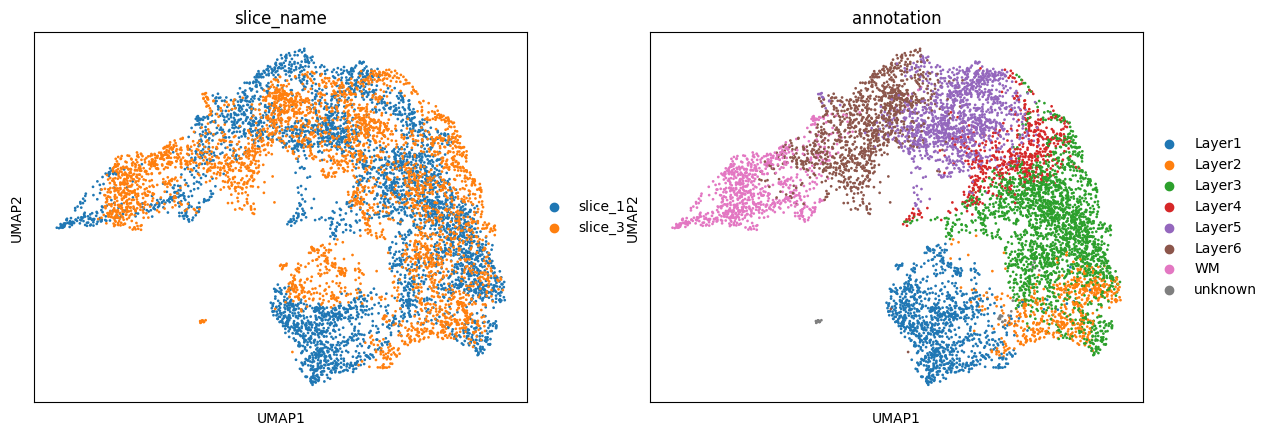

In [19]:
sc.pl.umap(adata_com, color= ['slice_name','annotation'])

d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


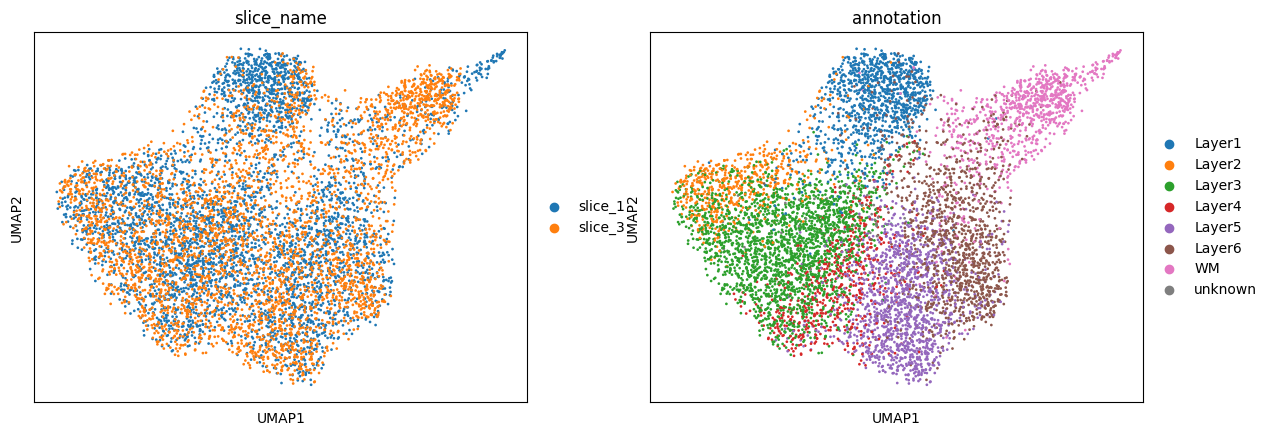

In [20]:
sc.pl.umap(adata_com_2, color= ['slice_name','annotation'])

In [45]:
best, index, distance = spatial_match(features, adatas=[adata_1,adata_3], reorder=False)

In [46]:
true_labels_1 = adata_1.obs['annotation'].to_numpy()
true_labels_3 = adata_3.obs['annotation'].to_numpy()

print(f"Max index in best: {np.max(best)}")
print(f"Size of true_labels_3: {true_labels_3.size}")

Max index in best: 4223
Size of true_labels_3: 3639


In [51]:
best

array([1460,   14, 2113, ..., 1691, 1859, 1282], dtype=int64)

In [52]:
import numpy as np
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# 提取真实标签
true_labels_1 = adata_1.obs['annotation'].to_numpy()
true_labels_3 = adata_3.obs['annotation'].to_numpy()

# 打印嵌入的形状和标签的大小
print(f"Shape of embd0: {embd0.shape}")
print(f"Shape of embd1: {embd1.shape}")
print(f"Size of true_labels_1: {true_labels_1.size}")
print(f"Size of true_labels_3: {true_labels_3.size}")

# 运行 spatial_match 函数获得最佳匹配索引
best, index, distance = spatial_match([embd0, embd1], adatas=[adata_1, adata_3], reorder=False)

# 检查 best 索引的范围
print(f"Max index in best: {np.max(best)}")
print(f"Min index in best: {np.min(best)}")
print(f"Size of best: {best.size}")

# 确保索引在有效范围内
valid_indices = best < true_labels_1.size
valid_best = best[valid_indices]
valid_indices = np.arange(len(best))[valid_indices]  # 获取有效的索引

# 确保 true_labels_1 和 valid_best 的长度匹配
aligned_true_labels_1 = true_labels_1[valid_best]
matched_labels_3 = true_labels_3[valid_indices]

# 打印对齐后的标签长度
print(f"Length of aligned_true_labels_1: {aligned_true_labels_1.size}")
print(f"Length of matched_labels_3: {matched_labels_3.size}")

# 打印对齐后的索引和标签
print("Valid best indices and their corresponding labels in true_labels_1:")
for idx, label in zip(valid_best, aligned_true_labels_1):
    print(f"Index: {idx}, Label: {label}")

print("Valid indices in true_labels_3 and their corresponding labels:")
for idx, label in zip(valid_indices, matched_labels_3):
    print(f"Index: {idx}, Label: {label}")

# 计算 ARI 和 NMI
ari = adjusted_rand_score(aligned_true_labels_1, matched_labels_3)
nmi = normalized_mutual_info_score(aligned_true_labels_1, matched_labels_3)

print(f'ARI: {ari}, NMI: {nmi}')


Shape of embd0: torch.Size([4226, 256])
Shape of embd1: torch.Size([3639, 256])
Size of true_labels_1: 4226
Size of true_labels_3: 3639
Max index in best: 4223
Min index in best: 3
Size of best: 3639
Length of aligned_true_labels_1: 3639
Length of matched_labels_3: 3639
Valid best indices and their corresponding labels in true_labels_1:
Index: 1460, Label: Layer3
Index: 14, Label: Layer1
Index: 2113, Label: WM
Index: 1272, Label: Layer3
Index: 2065, Label: Layer6
Index: 963, Label: Layer6
Index: 3256, Label: WM
Index: 2191, Label: Layer3
Index: 551, Label: Layer2
Index: 1299, Label: Layer5
Index: 2321, Label: WM
Index: 2287, Label: Layer5
Index: 1545, Label: Layer5
Index: 688, Label: Layer3
Index: 3972, Label: Layer5
Index: 1515, Label: Layer4
Index: 1839, Label: Layer6
Index: 152, Label: Layer5
Index: 551, Label: Layer2
Index: 533, Label: Layer5
Index: 2289, Label: WM
Index: 3870, Label: WM
Index: 2105, Label: Layer2
Index: 1282, Label: Layer3
Index: 347, Label: Layer3
Index: 238, Lab

In [53]:
import numpy as np
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# 提取真实标签
true_labels_1 = adata_1.obs['annotation'].to_numpy()
true_labels_3 = adata_3.obs['annotation'].to_numpy()

# 打印嵌入的形状和标签的大小
print(f"Shape of embd2: {embd2.shape}")
print(f"Shape of embd3: {embd3.shape}")
print(f"Size of true_labels_1: {true_labels_1.size}")
print(f"Size of true_labels_3: {true_labels_3.size}")

# 运行 spatial_match 函数获得最佳匹配索引
best, index, distance = spatial_match([embd2, embd3], adatas=[adata_1, adata_3], reorder=False)

# 检查 best 索引的范围
print(f"Max index in best: {np.max(best)}")
print(f"Min index in best: {np.min(best)}")
print(f"Size of best: {best.size}")

# 确保索引在有效范围内
valid_indices = best < true_labels_1.size
valid_best = best[valid_indices]
valid_indices = np.arange(len(best))[valid_indices]  # 获取有效的索引

# 确保 true_labels_1 和 valid_best 的长度匹配
aligned_true_labels_1 = true_labels_1[valid_best]
matched_labels_3 = true_labels_3[valid_indices]

# 打印对齐后的标签长度
print(f"Length of aligned_true_labels_1: {aligned_true_labels_1.size}")
print(f"Length of matched_labels_3: {matched_labels_3.size}")

# 打印对齐后的索引和标签
print("Valid best indices and their corresponding labels in true_labels_1:")
for idx, label in zip(valid_best, aligned_true_labels_1):
    print(f"Index: {idx}, Label: {label}")

print("Valid indices in true_labels_3 and their corresponding labels:")
for idx, label in zip(valid_indices, matched_labels_3):
    print(f"Index: {idx}, Label: {label}")

# 计算 ARI 和 NMI
ari = adjusted_rand_score(aligned_true_labels_1, matched_labels_3)
nmi = normalized_mutual_info_score(aligned_true_labels_1, matched_labels_3)

print(f'ARI: {ari}, NMI: {nmi}')


Shape of embd2: torch.Size([4226, 2048])
Shape of embd3: torch.Size([3639, 2048])
Size of true_labels_1: 4226
Size of true_labels_3: 3639
Max index in best: 4224
Min index in best: 0
Size of best: 3639
Length of aligned_true_labels_1: 3639
Length of matched_labels_3: 3639
Valid best indices and their corresponding labels in true_labels_1:
Index: 1130, Label: Layer3
Index: 2865, Label: Layer1
Index: 2646, Label: WM
Index: 2577, Label: Layer3
Index: 345, Label: Layer6
Index: 1099, Label: WM
Index: 1692, Label: WM
Index: 4143, Label: Layer2
Index: 2144, Label: Layer2
Index: 3404, Label: Layer6
Index: 2854, Label: WM
Index: 3255, Label: Layer5
Index: 2844, Label: Layer5
Index: 2812, Label: Layer3
Index: 2115, Label: Layer5
Index: 2416, Label: Layer4
Index: 795, Label: Layer2
Index: 1121, Label: Layer5
Index: 2363, Label: Layer3
Index: 4119, Label: Layer6
Index: 685, Label: WM
Index: 3807, Label: WM
Index: 2078, Label: Layer1
Index: 2267, Label: Layer2
Index: 383, Label: Layer4
Index: 2646,

In [37]:
adata1_df = pd.DataFrame({'index': range(embd0.shape[0]),
                        'x': adata_1.obsm['spatial'][:,0],
                        'y': adata_1.obsm['spatial'][:,1],
                        'celltype': adata_1.obs['annotation']})
adata3_df = pd.DataFrame({'index': range(embd1.shape[0]),
                        'x': adata_3.obsm['spatial'][:,0],
                        'y': adata_3.obsm['spatial'][:,1],
                        'celltype': adata_3.obs['annotation']})

matching = np.array([range(index.shape[0]), best])
best_match = distance[:,0]

dataset1: 8 cell types; dataset2: 8 cell types; 
                    Total :8 celltypes; Overlap: 8 cell types 
                    Not overlap :[[]]
Subsampled 300 pairs from 3639
Count of matches with equal cell types: 1
Count of matches with not equal cell types: 0
Count of matches with equal cell types: 1
Count of matches with not equal cell types: 1
Count of matches with equal cell types: 1
Count of matches with not equal cell types: 2
Count of matches with equal cell types: 2
Count of matches with not equal cell types: 2
Count of matches with equal cell types: 2
Count of matches with not equal cell types: 3
Count of matches with equal cell types: 2
Count of matches with not equal cell types: 4
Count of matches with equal cell types: 3
Count of matches with not equal cell types: 4
Count of matches with equal cell types: 4
Count of matches with not equal cell types: 4
Count of matches with equal cell types: 4
Count of matches with not equal cell types: 5
Count of matches with equal

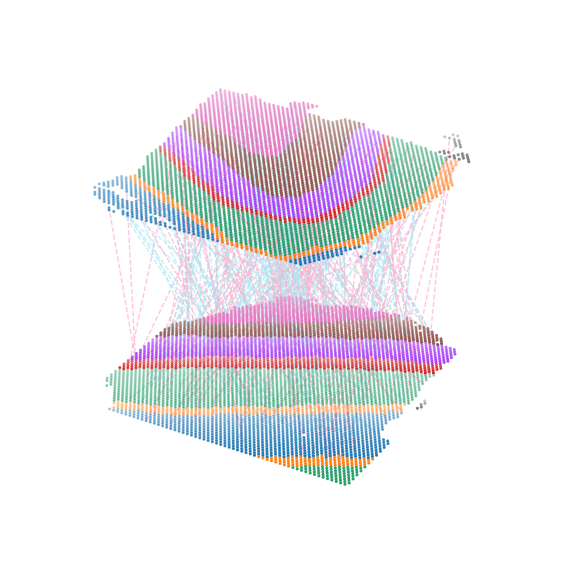

In [38]:
multi_align = match_3D_multi(adata1_df, adata3_df, matching,meta='celltype',
                            scale_coordinate=True, subsample_size=300)
multi_align.draw_3D(size=[7, 8], line_width=1, point_size=[1.5,1.5], hide_axis=True)

In [40]:
adata1_SLAT_df = pd.DataFrame({'index': range(embd1.shape[0]),
                        'x': adata_1.obsm['spatial'][:,0],
                        'y': adata_1.obsm['spatial'][:,1],
                        'celltype': adata_1.obs['annotation']})
# adata3_SLAT_df = pd.DataFrame({'index': range(embd2.shape[0]),
#                         'x': adata_3.obsm['spatial'][:,0],
#                         'y': adata_3.obsm['spatial'][:,1],
#                         'celltype': adata_3.obs['annotation']})

# matching = np.array([range(index.shape[0]), best])
# best_match = distance[:,0]

ValueError: All arrays must be of the same length

In [21]:
start = time.time()
matching_list, zip_res = run_SLAT_mlp2([adata_1,adata_2,adata_3], k_cutoff=10)
print(f'Use {time.time()-start:.2f} seconds')

AttributeError: 'float' object has no attribute 'time'

In [ ]:
matching_list

[array([[ 460,  513,  995, 1346, 1986, 2178, 2358, 2371, 2625, 2702, 3095,
         3128, 3600],
        [3582, 3542, 4133, 1527,  361, 3026, 2385, 2764,  327, 2838, 3582,
         2838, 3542]], dtype=int64),
 array([], shape=(2, 0), dtype=int64)]

In [ ]:
zip_res

[(array([3783, 2113, 1135, ...,  822, 3813, 2124], dtype=int64),
  array([[3783, 2993, 2686, ..., 3424, 2349, 3542],
         [2113, 3293, 2265, ..., 2274, 3355, 2466],
         [1135, 3885, 3271, ..., 1770, 1867,  642],
         ...,
         [ 822, 2382, 1256, ..., 3981,  855, 2928],
         [3813, 1321,   79, ..., 4078, 1568, 4216],
         [2124, 2663, 1803, ..., 2204, 1916,  172]], dtype=int64),
  array([[0.646354  , 0.6412606 , 0.6273894 , ..., 0.48207468, 0.48137417,
          0.4799696 ],
         [0.666595  , 0.6601334 , 0.6485337 , ..., 0.52997994, 0.52955204,
          0.5267309 ],
         [0.47332388, 0.43455762, 0.41172335, ..., 0.3082121 , 0.30786768,
          0.30747905],
         ...,
         [0.63894945, 0.5905614 , 0.581819  , ..., 0.49719432, 0.49592838,
          0.49568394],
         [0.58300173, 0.54899573, 0.5421246 , ..., 0.40020984, 0.40012068,
          0.39943272],
         [0.56281984, 0.5334598 , 0.5072653 , ..., 0.3700102 , 0.36939955,
          0.369

Mapping 0th layer 
Mapping 1th layer 


ValueError: a must be greater than 0 unless no samples are taken

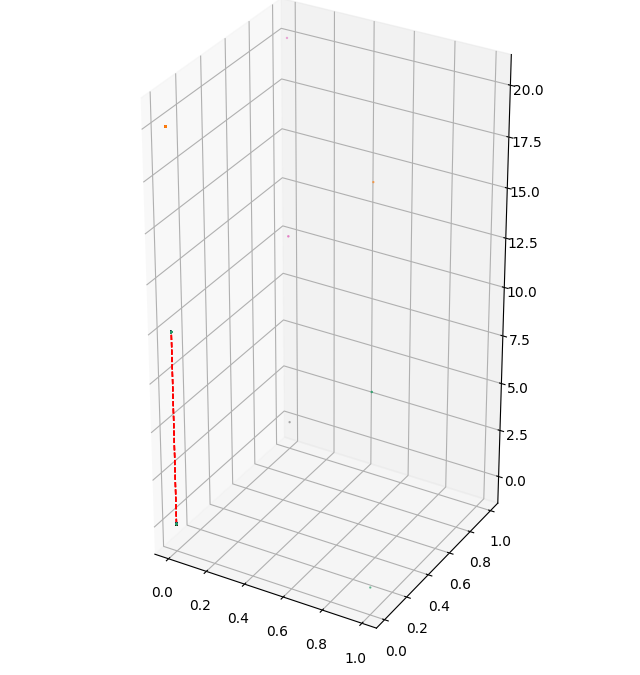

In [ ]:
model = build_3D([adata_1,adata_2,adata_3], matching_list,'spatial','annotation',5)
model.draw_3D(hide_axis=True, line_color='red', height=10, size=[8,20], line_width=1)